# Finding the Spring Constant of a Particular Spring from Hanging Masses  and Measuring Extension, using Hooke's Law.

In this Jupyter Notebook I will be using data stored in a csv file to calculate the spring constant of a spring by plotting a graph of extension on the y-axis against mass. Then I will find the unweighted and weighted line of best fit, to give two values for the spring constant of the spring used. The value of the mass is measured in grams, the extension and the error on the extension are measured in mm.

In [1]:
#------------------------------------------------------------------------
# Date: 25/10/22 Written by Konstantinos Doran
#------------------------------------------------------------------------
#import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#x is the mass in grams, y is the extension in mm and the error dy is in mm
x, y, dy = np.loadtxt("spring.csv", delimiter = ",", unpack = True)
mass = x/1000 #mass on spring/kg
ext = y/1000 #extension of spring/m
dext = dy/1000 #error of extension/m
#print(mass)
#print(ext)
#print(dext)


Now that the libraries have been imported we can now use polyfit to calculate values for the weighted and unweighted line coefficients.

In [2]:
#fit a straight line as using Hooke's Law
poldegree = 1

#find gradient and y-intercept plus error
unwcoeff, unwerror = np.polyfit(mass, ext, poldegree,cov=True)
unwgrad, unwint = unwcoeff
dunwgrad, dunwint = np.sqrt(np.diag(unwerror))

#output raw value and value to appropriate s.f
print(f"unweighted gradient = {unwgrad} +- {dunwgrad}")
print(f"unweighted intercept = {unwint} +- {dunwint}")
print(f"unweighted gradient = {unwgrad:.3f} +- {dunwgrad:.3f} to 3dp")
print(f"unweighted intercept = {unwint:.4f} +- {dunwint:.4f} to 4dp")

#find gradient and y-intercept plus error
wcoeff,werror = np.polyfit(mass, ext, poldegree, w=1/dext, cov = "unscaled")
wgrad,wint = wcoeff
dwgrad,dwint = np.sqrt(np.diag(werror))

#output raw value and value to appropriate s.f
print(f"weighted gradient = {wgrad} +- {dwgrad}") #units
print(f"weighted intercept = {wint} +- {dwint}") #units
print(f"weighted gradient = {wgrad:.3f} +- {dwgrad:.3f} to 3dp") #units
print(f"weighted intercept = {wint:.4f} +- {dwint:.4f} to 4dp") #units

unweighted gradient = 0.08172727272727276 +- 0.0012770489397400577
unweighted intercept = 0.6179200000000002 +- 0.0001584776057213276
unweighted gradient = 0.082 +- 0.001 to 3dp
unweighted intercept = 0.6179 +- 0.0002 to 4dp
weighted gradient = 0.08172727272727331 +- 0.002752409412815904
weighted intercept = 0.6179199999999998 +- 0.00034156502553198684
weighted gradient = 0.082 +- 0.003 to 3dp
weighted intercept = 0.6179 +- 0.0003 to 4dp


Now that we have values for the weighted and unweighted lines we can now plot them on a graph. 

Text(0.025, 0.6185, 'weighted y = (0.082 +- 0.003)x + (0.6179 +- 0.0003)')

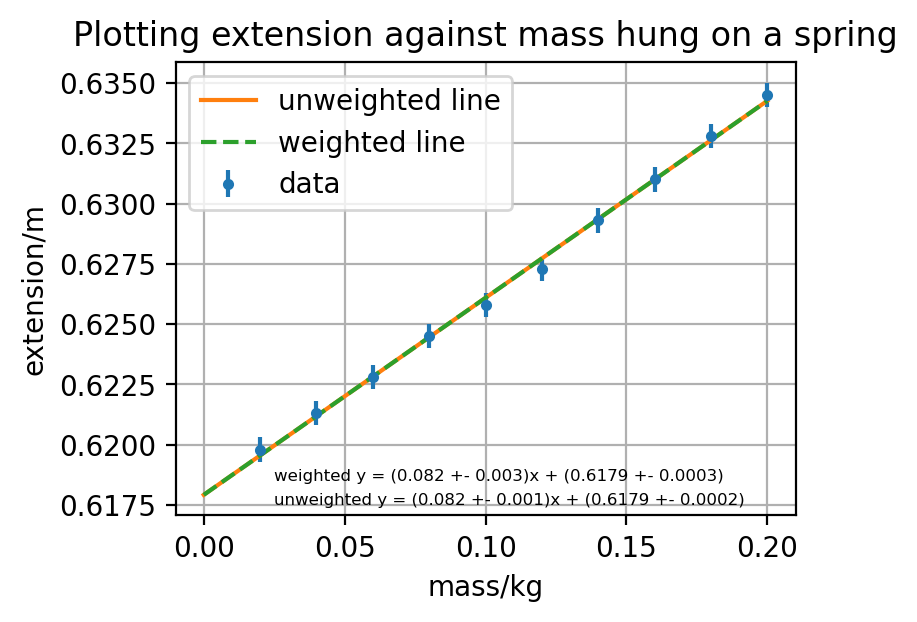

In [3]:
#create unweighted and weighted lines
xline = np.array([0,0.1, 0.2])
unwyline = unwgrad * xline + unwint
wyline = wgrad *xline + wint

#code adapted from Unit 3 X-ray Data assignment and Unit4Notes:https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305180
#plot graph
plt.figure(figsize = (4,3), dpi = 200)
#add a grid
plt.grid(True)
plt.title("Plotting extension against mass hung on a spring")
plt.xlabel("mass/kg") #label x axis
plt.ylabel("extension/m") #label y axis
plt.errorbar(mass, ext, yerr = dext, fmt=".", label ="data")
plt.plot(xline, unwyline,"-" ,label = "unweighted line")
plt.plot(xline, wyline,"--", label = "weighted line") #use dashed line so both visible
plt.legend(loc="best")
#Code adapted from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html 
#add text for equation of lines
plt.text(0.025,0.6175,f"unweighted y = ({unwgrad:.3f} +- {dunwgrad:.3f})x + ({unwint:.4f} +- {dunwint:.4f})", fontsize = 6)
plt.text(0.025,0.6185,f"weighted y = ({wgrad:.3f} +- {dwgrad:.3f})x + ({wint:.4f} +- {dwint:.4f})", fontsize = 6)

Both the weighted and unweighted fits produce the same values (to 3dp) for the gradient and y-intercept but the weighted line has a larger error compared to the unweighted. The values are the same as all the error bars are the same size so each data point is weighted equally, like in the unweighted line. 

As $ F=kx $ and $ mg = kx $, the gradient of the graph is $ \frac{x}{m} $ then the gradient is $ \frac{g}{k} $ so to find k, we need to find the reciprocal of gradient multiplied by g: $ k = \frac{g}{gradient} $. $g = 9.81 \pm 0.01 ms^{-2}$ 

In [7]:
#find values for the spring constant
g = 9.81 #ms^-2
dg = 0.01 #ms^-2
unw_k = g/unwgrad #Nm^-1
unw_dk = (dunwgrad*unw_k)/unwgrad #Nm^-1
w_k = g/wgrad #Nm^-1
w_dk = (dwgrad*unw_k)/wgrad #Nm^-1

#output values
#print(unw_k)
#print(unw_dk)
print(f"The unweighted spring constant k = {unw_k:.0f} +- {unw_dk:.0f} Nm^-1")
print(f"The weighted spring constant k = {w_k:.0f} +- {w_dk:.0f} Nm^-1")

The unweighted spring constant k = 120 +- 2 Nm^-1
The weighted spring constant k = 120 +- 4 Nm^-1


Conclusion:<br>
When comparing both the unweighted and weighted lines, which both give the same value for the spring constant on this occasion the weighted line was not necessary for this particular data set due to the errors all being equal. The final calculated value for $k$ was $ k = 120 \pm 1Nm^{-1} $.